# Машинное обучение, DS-поток, осень 2022
## Задание 3.2


**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

* Задача 1 &mdash; 4 баллов;
* Задача 2 &mdash; 3 баллов;
* Задача 3 &mdash; 12 баллов.

----

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(palette='Set2')
from umap.umap_ import UMAP
from umap import umap_
import mnist_reader
import numpy.core.defchararray as np_f
from sklearn.decomposition import PCA
import scipy as sp

### Задача 1

Пусть $X_1 , ..., X_n$ &mdash; выборка в пространстве $\mathbb{R}^D$ , а $Y_1, ..., Y_n$ &mdash; ее проекция на линейное подпространство размерности $d < D$. Докажите, что величина
$$\sum_{i=1}^{n} (X_i - Y_i)^2$$
минимальна, если $Y_1, ..., Y_n$ &mdash; проекция на линейное подпространство, образованное первыми $d$ главными компонентами. 

Чему она равна?

---
### Задача 2

Fashion-MNIST — набор данных изображений одежды, обуви и аксессуаров, состоящий из обучающего набора из 60 000 изображений и тестового набора из 10 000 изображений. Каждое изображение имеет размер 28x28 пикселей в оттенках серого.

Скачайте <a href="https://github.com/zalandoresearch/fashion-mnist">репозиторий</a> и загрузите данные с помощью скрипта `utils/mnist_reader.py`.

In [15]:
X_train, y_train = mnist_reader.load_mnist(
    'fashion-mnist/data/fashion', kind='train'
)
X_test, y_test = mnist_reader.load_mnist(
    'fashion-mnist/data/fashion', kind='t10k'
)

Объединим все данные и зададим названия классов

In [16]:
data = np.array(np.vstack([X_train, X_test]), dtype=np.float64) / 255.0
target = np.hstack([y_train, y_test])
classes = [
    'Футболки/топы',
    'Брюки',
    'Свитеры',
    'Платья',
    'Пальто',
    'Сандалии',
    'Рубашки',
    'Кроссовки',
    'Сумки',
    'Сапоги'
]

Посмотрите на размер данных и напечатайте несколько изображений

In [17]:
data.shape

(70000, 784)

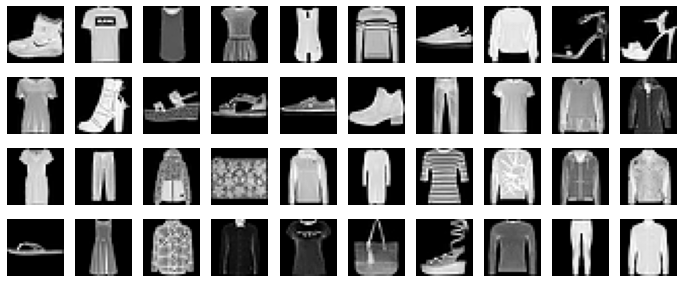

In [18]:
plt.figure(figsize=(12, 5))    
for i in range(40):
    plt.subplot(4, 10, i + 1)
    plt.imshow(data[i].reshape((28, 28)), cmap='gray')
    plt.axis('off')

UMAP для сжатия в двумерное пространство. Не забывайте про особенности моделей и про смысл их гиперпараметров.

Не совсем понятно, что имееться в виду под "Не забывайте про особенности моделей и про смысл их гиперпараметров.". Я должен сделать предобработку? Если да, то какую? У меня нет идей(

In [19]:
result = UMAP(n_components=2).fit_transform(data)

Визуализируйте полученные результаты. В качестве цвета точки используйте ее класс. Не забудьте добавить легенду или colorbar.

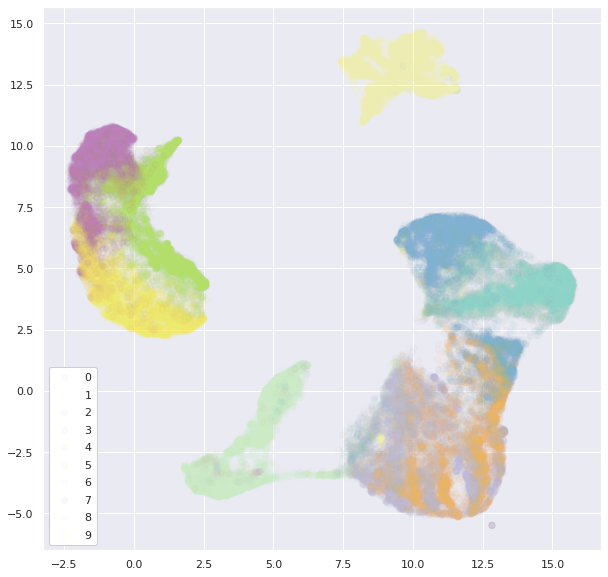

In [29]:
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10)
scatter = ax.scatter(result[:, 0], result[:, 1], alpha=0.05, c=target, cmap = 'Set3')
plt.legend(*scatter.legend_elements(), loc="lower left", framealpha=1, facecolor='w')
plt.show()

Мне не нравиться в графике то, что во первых в подписях вместо названий одежды цифры, во вторых то, что сам я не могу увеличить в легенде яркость точек но я не нагуглил как это изменить. Если вы знаете как, то напишите пж.

Проинтерпретируйте полученные результаты. Удалось ли выделить кластеры? Что можно сказать про взаиморасположение кластеров в двумерном пространстве?

Кластеры выделить удалось. Очень хорошо выделились брюки и сумки. Не идеально, но тоже не плохо выделились красовки сапоги и сандалии. Они находяться вместе, поэтому то, что они оказались в одном кластере логично, и впринципе можно считать успехом. Все остальное а именно футболки, свитеры, платья, пальто, рубашки выделелись в другую категорию. Вобщем и целом не плохо.

Обучите UMAP, передав ему также метки классов, и визуализируйте результаты. Как изменились результаты?

In [30]:
lean_result = UMAP(n_components=2).fit_transform(data, y=target)

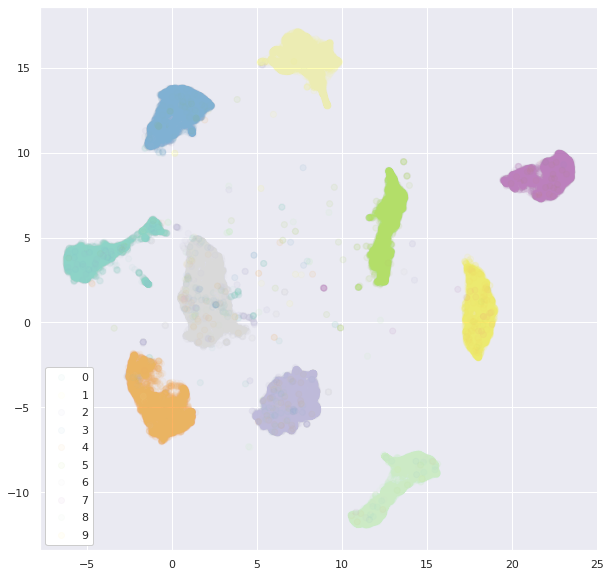

In [32]:
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10)
scatter = ax.scatter(lean_result[:, 0], lean_result[:, 1], alpha=0.05, c=target, cmap = 'Set3')
plt.legend(*scatter.legend_elements(), loc="lower left", framealpha=1, facecolor='w')
plt.show()

Это нельзя считать достаточно честным. Давайте обучим модель на тренировочной и проверим на тестовой.

In [102]:
new_lean_result = UMAP(n_components=2).fit(X_train, y=y_train)

In [104]:
learning_data = new_lean_result.transform(X_test)

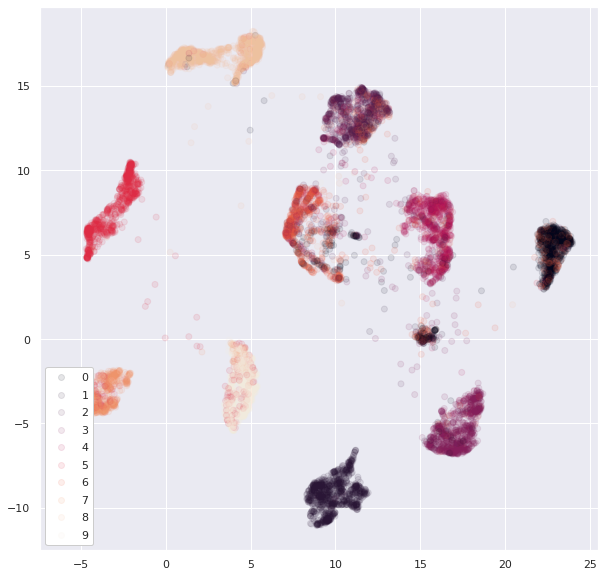

In [105]:
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10)
scatter = ax.scatter(learning_data[:, 0], learning_data[:, 1], alpha=0.1, c=y_test)
plt.legend(*scatter.legend_elements(), loc="lower left", framealpha=1, facecolor='w')
plt.show()

Очень не плохо. Хз как это работает, но прям круто.

---
### Задача 3

Рассмотрим датасет **Leaf Classification**:
	
https://www.kaggle.com/c/leaf-classification
	
Данные содержат 1584 изображений образцов листьев (16 изображений для 99 видов). По ссылке доступно подробное описание данных. Для вашего удобства размер	некоторых изображении был изменен, в результате чего все изображения имеют одинаковый размер $170 \times 250$. 
* Скачайте файл с данными на сайте курса.
* Загрузите все изображения с помощью `plt.imread` и визуализируйте некоторые из них. Каждое изображение &mdash; матрица размера $170 \times 250$.
* В файле `train_labels.csv` указаны номера образцов листьев, которые относятся к обучающей части данных, а так же их виды. Разделите данные на обучающую и тестовую часть.
* На обучающей части данных постройте 30 главных компонент. Какую долю дисперсии данных они объясняют? Какую долю дисперсии объясняет каждая компонента отдельно?
* Визуализируйте главные компоненты. Можете ли вы их как-то охарактеризовать?
* Визуализируйте обучающую часть данных в проекции на две первых главных компоненты. Цвет точки должен соответствовать виду образца. Используйте `cmap=’Set1’` во избежании градации цвета по номеру вида. Наблюдаются ли какие-либо закономерности?
* Визуализируйте данные при помощи UMAP двумя способами — на основе исходных признаков (пиксели) и по проекциям на первые 30 главных компонент. Кластеризуются ли точки?


In [2]:
draw = list()
for i in range(1, 1585):
    draw.append(plt.imread('Leaf_Images/scaled_images/' + str(i) + '.jpg'))

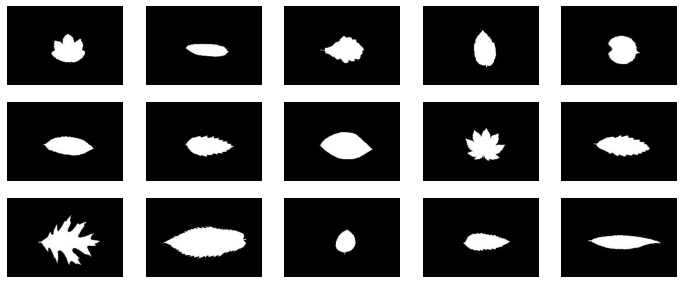

In [3]:
plt.figure(figsize=(12, 5))    
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(draw[i], cmap='gray')
    plt.axis('off');

In [4]:
labels = pd.read_csv('Leaf_Images/train_labels.csv')

In [5]:
train = list()
test = list()
the_last_appending = 0
for i in labels['id']:
    if(i - the_last_appending != 1):
        for j in range(the_last_appending + 1, i):
            test.append(draw[j - 1].reshape(42500, ))
        train.append(draw[i - 1].reshape(42500, ))
        the_last_appending = i
    else:
        train.append(draw[i - 1].reshape(42500, ))
        the_last_appending = i
train = np.array(train)
test = np.array(test)

Визуализируем первые 10 листочков, чтобы можно было оценить качество сжатия.

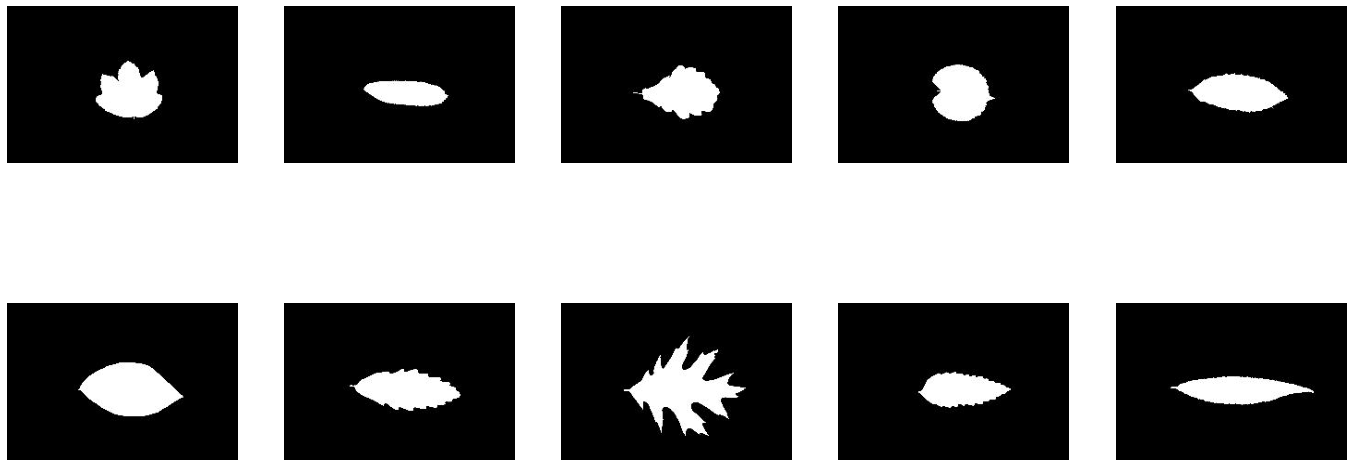

In [6]:
plt.figure(figsize=(24, 10))    
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(train[i].reshape((170, 250)), cmap='gray')
    plt.axis('off');

In [7]:
pca = PCA(n_components=30)
transform_X = pca.fit_transform(train)

Посмотри теперь на первые 10 листочков

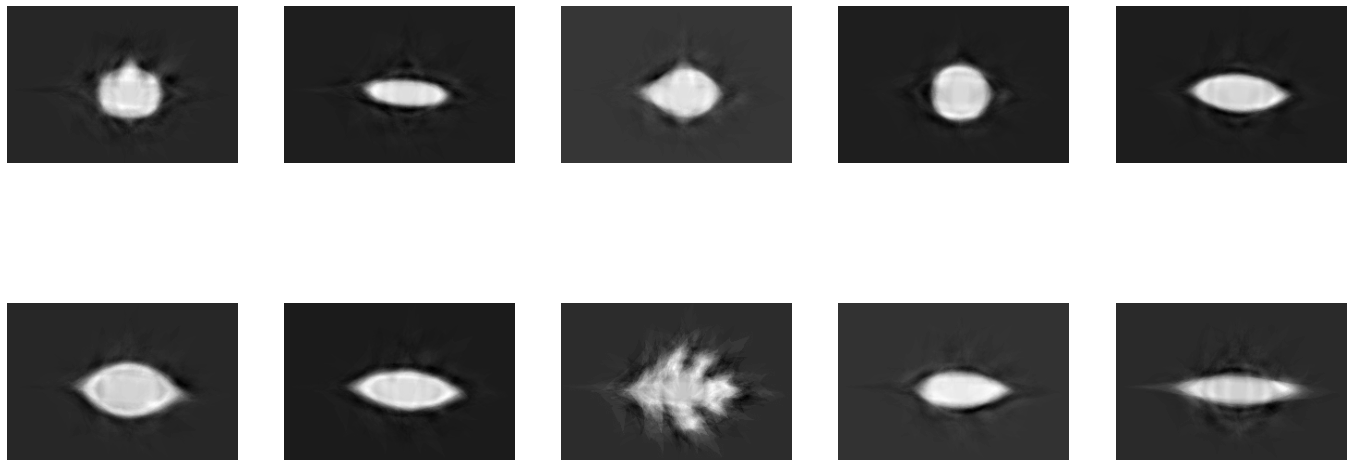

In [8]:
plt.figure(figsize=(24, 10))
X_hat = pca.inverse_transform(transform_X)
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_hat[i].reshape((170, 250)), cmap='gray')
    plt.axis('off');

Постоим 30 главных компанент

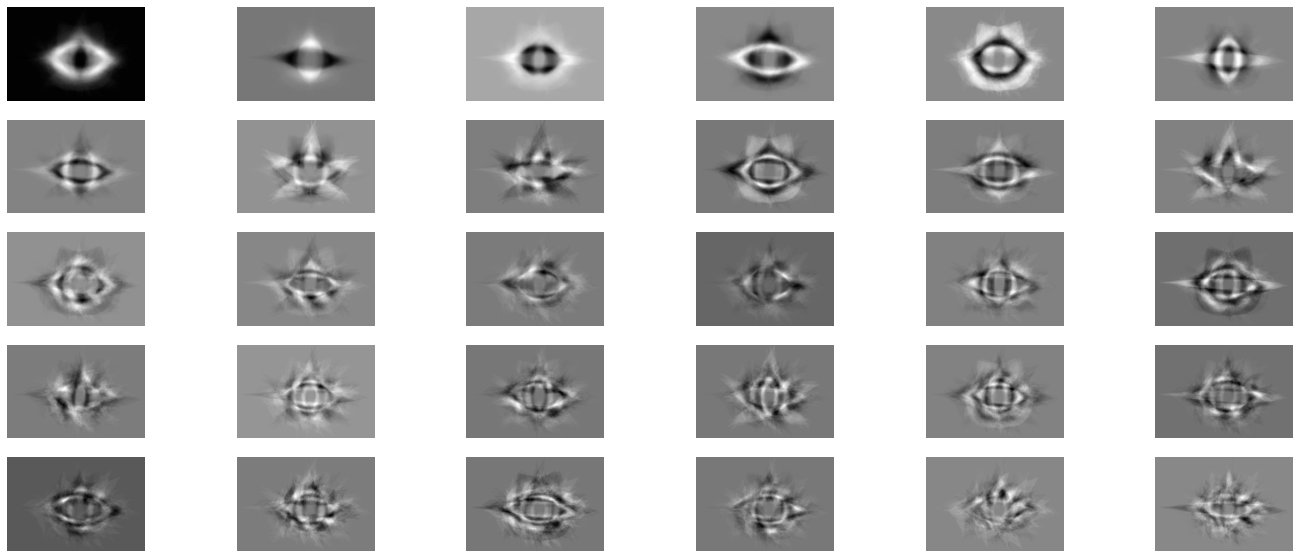

In [10]:
plt.figure(figsize=(24, 10))
for i in range(30):
    plt.subplot(5, 6, i + 1)
    plt.imshow(pca.components_[i].reshape((170, 250)), cmap='gray')
    plt.axis('off')

Осмысленными их назвать сложно. Давайте нарисуем среднее. Но кстати что интересно, в каждой из них есть симметрия минимум относительно одной из осей

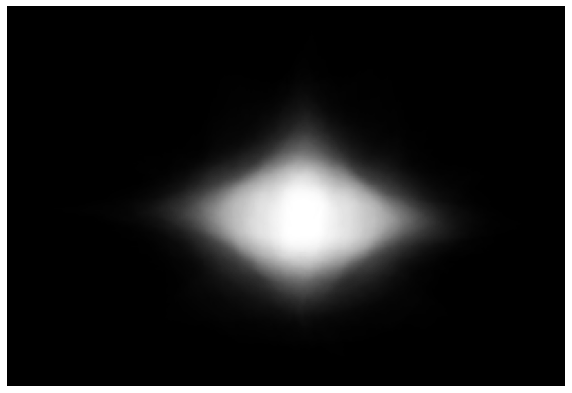

In [12]:
plt.figure(figsize=(10, 10))
plt.imshow(pca.mean_.reshape((170, 250)), cmap='gray')
plt.axis('off')
plt.show()

Ну чтож исследуем необъясненную дисперсию

In [19]:
singular_values = np.sqrt(sp.linalg.svdvals(train))

Не объясненная дисперсия при 30 главных компанентах

In [17]:
error = singular_values[::-1].cumsum() / singular_values.sum()
error = error[::-1]
print(error[29])

0.90725535


Чет как-то совсем грустно. Но оно и понятно если посмотреть на лямбды видно, что они убывают почти непрерывно. Давайте построим график необъяесненной дисперсии от количества главных компанент

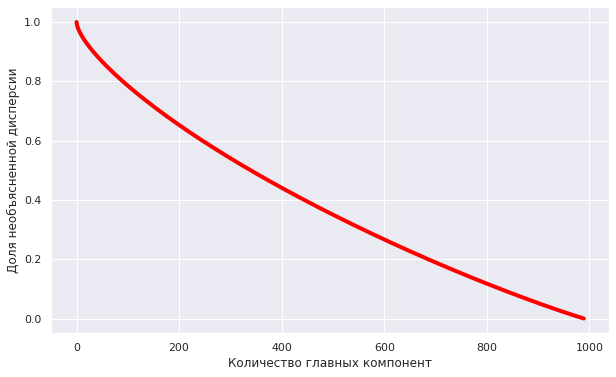

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(error)), error, c='red', linewidth=4)
plt.xlabel('Количество главных компонент')
plt.ylabel('Доля необъясненной дисперсии')
plt.show()

Собственно вот. Видно, что график спускаеться достаточно плавно. Ну ладно теперь посмотрим какую долю дисперсии объяснеяет каждая из главных компанент.

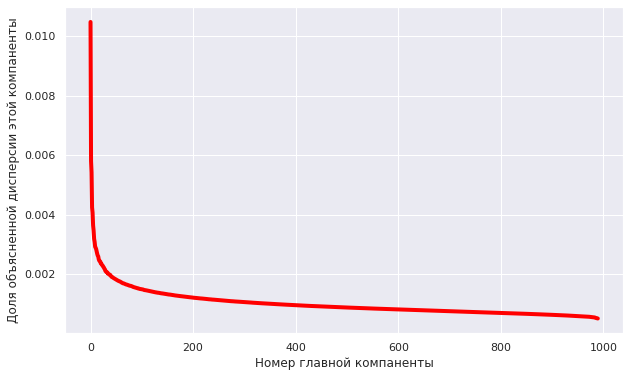

In [26]:
own_companent_errors = singular_values / singular_values.sum()
plt.figure(figsize=(10, 6))
plt.plot(range(len(own_companent_errors)), own_companent_errors, c='red', linewidth=4)
plt.xlabel('Номер главной компаненты')
plt.ylabel('Доля объясненной дисперсии этой компаненты')
plt.show()

Эх. Вот было бы в жизни счастье так бы выглядел график для кумулятивной суммы. Ну ладно приблизим первые 50

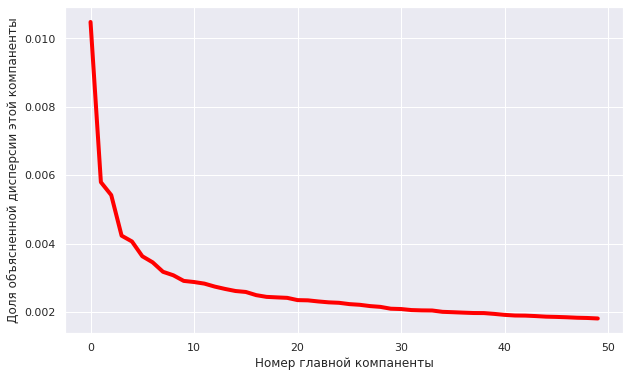

In [27]:
own_companent_errors = singular_values [: 50]/ singular_values.sum()
plt.figure(figsize=(10, 6))
plt.plot(range(len(own_companent_errors)), own_companent_errors, c='red', linewidth=4)
plt.xlabel('Номер главной компаненты')
plt.ylabel('Доля объясненной дисперсии этой компаненты')
plt.show()

Глядя на него я понял почему в задание было сказано брать именно 30 главных компанент.После 30 все главные компаненты объясняют примерно одинаково мало дисперсии. 

In [28]:
pca = PCA(n_components=2)
transform_X = pca.fit_transform(train)

In [36]:
labels['code'] = labels['species'].astype('category').cat.codes

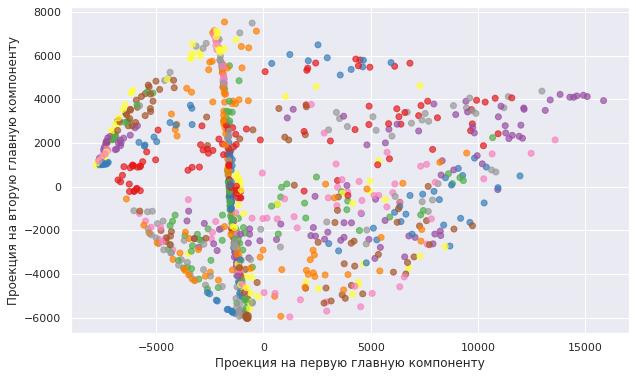

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(transform_X[:, 0], transform_X[:, 1], 
            alpha=0.7, c=labels['code'], cmap='Set1' )
plt.xlabel('Проекция на первую главную компоненту')
plt.ylabel('Проекция на вторую главную компоненту')
plt.show()

Не вообще не заметно кластеризации. Ну оно и ожидаемо. С такой то долей не объясненной дисперсии.

Попробуем заиспользовать Umap. Не смотря, что в задании этого нет посмотрим на то, как он себя покажет с учителем и без.

Сначало посмотрим на поведение  без учителя на всех данных

In [39]:
all_not_teacher = UMAP(n_components=2).fit_transform(train)


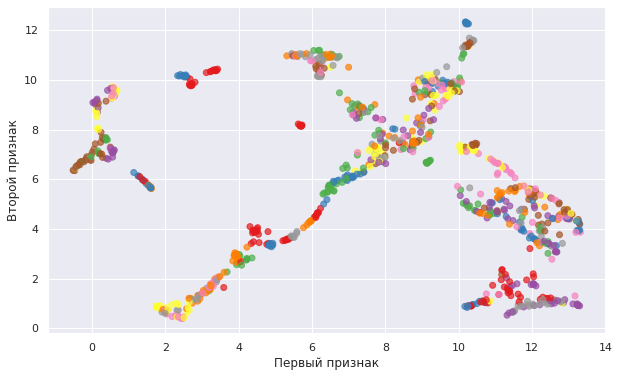

In [44]:
plt.figure(figsize=(10, 6))
plt.scatter(all_not_teacher[:, 0], all_not_teacher[:, 1], 
            alpha=0.7, c=labels['code'], cmap='Set1' )
plt.xlabel('Первый признак')
plt.ylabel('Второй признак')
plt.show()

Ну такое. Вроде что-то есть, но прям четко кластеров не видно

Попробуем построить модельку с учителем

In [40]:
all_with_teacher = UMAP(n_components=2).fit_transform(train, y=labels['code'])


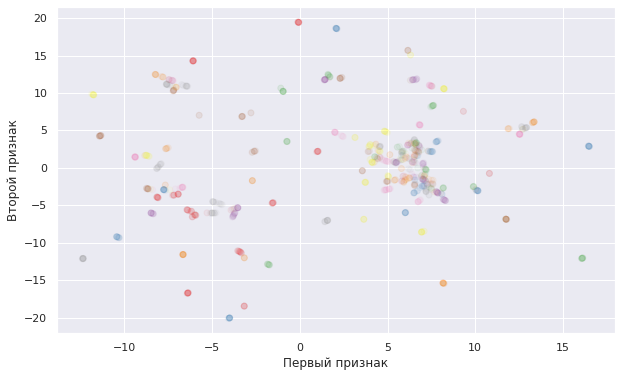

In [46]:
plt.figure(figsize=(10, 6))
plt.scatter(all_with_teacher[:, 0], all_with_teacher[:, 1], 
            alpha=0.05, c=labels['code'], cmap='Set1' )
plt.xlabel('Первый признак')
plt.ylabel('Второй признак')
plt.show()

Не на много лучше. Я бы сказал немного хуже. Давайте посмотрим на кластерезацию по первым 30 главным компанентам. Врятли там будет что-то нормальное, но чем черт не шутит

In [41]:
pca = PCA(n_components=30)
transform_X = pca.fit_transform(train)

In [42]:
main = UMAP(n_components=2).fit_transform(transform_X)

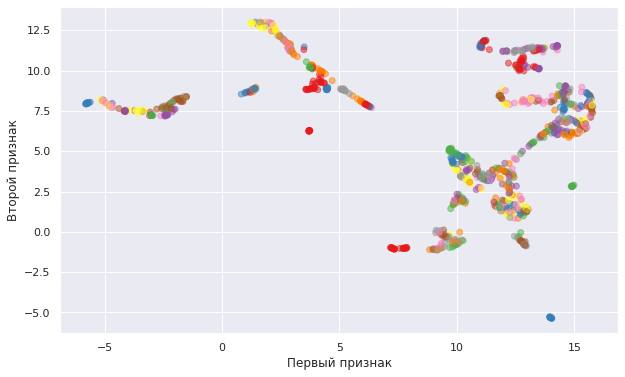

In [48]:
plt.figure(figsize=(10, 6))
plt.scatter(main[:, 0], main[:, 1], 
            alpha=0.5, c=labels['code'], cmap='Set1' )
plt.xlabel('Первый признак')
plt.ylabel('Второй признак')
plt.show()

Как и ожидалось. Крайне посредственно.

Вывод. Далеко не все изображения можно достаточно точно представить с помощью PCA, так как в некоторых наборах значение лямбд падает очень медленно. Кластеризовать с помощью Umap по двум компанентам вполне удалось. Мы получили четко выделяемые кластеры, но они не очень осмысленные.  Существует мнение, что дело в том, что нам дали слишком разнородные данные. Вот если бы нам дали 16 видов, и для каждого из видов было бы 99 изображений, результат по моему был бы намного лучше. Возможно кластеры даже осмысленные, но так как 99 больше чем количество цветов в Set1  сказать это наверянка мы не сможем. 